https://movingpandas.github.io/movingpandas-website/2-analysis-examples/ship-data.html

In [2]:
''' 
Hướng dẫn này sử dụng dữ liệu AIS do Cơ quan hàng hải Đan Mạch xuất bản. 
1.Trajectory data preprocessing
    Loading movement data from common geospatial file formats
    Exploring spatial & non-spatial data distributions
    Applying filters to extract relevant data
    Converting GeoDataFrames into Trajectories describing continuous tracks of moving objects
2.Trajectory analysis
    Visualizing trajectories and their properties
    Filtering trajectories by area of interest
    Splitting continuous tracks into individual trips
    Exploring trip properties including: origins, destinations, and attributes
'''

' \nHướng dẫn này sử dụng dữ liệu AIS do Cơ quan hàng hải Đan Mạch xuất bản. \n1.Trajectory data preprocessing\n    Loading movement data from common geospatial file formats\n    Exploring spatial & non-spatial data distributions\n    Applying filters to extract relevant data\n    Converting GeoDataFrames into Trajectories describing continuous tracks of moving objects\n2.Trajectory analysis\n    Visualizing trajectories and their properties\n    Filtering trajectories by area of interest\n    Splitting continuous tracks into individual trips\n    Exploring trip properties including: origins, destinations, and attributes\n'

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp
import hvplot.pandas 
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts, dim
from os.path import exists
from urllib.request import urlretrieve

import warnings
warnings.filterwarnings('ignore')

plot_defaults = {'linewidth':5, 'capstyle':'round', 'figsize':(9,3), 'legend':True}
opts.defaults(opts.Overlay(active_tools=['wheel_zoom'], frame_width=500, frame_height=400))
hvplot_defaults = {'tiles':None, 'cmap':'Viridis', 'colorbar':True}

mpd.show_versions()

: 

In [43]:
%%time
df = read_file('test_data.csv')
print(f"Finished reading {len(df)}")

Finished reading 161431
CPU times: total: 48.6 s
Wall time: 1min 44s


In [44]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Lọc bỏ các hàng có Latitude == 91.0 và Longitude == 181.0
df = df[(df['Latitude'] != 91.0) & (df['Longitude'] != 181.0)]
df.shape

(161429, 23)

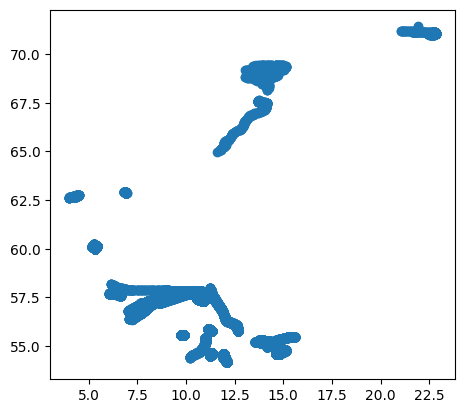

In [45]:
df['geometry'] = gpd.points_from_xy(df['Longitude'], df['Latitude'])

# Đặt cột geometry làm cột chính chứa hình học
df = df.set_geometry('geometry')

# Hiển thị biểu đồ
df.plot()

# Hiển thị biểu đồ với trục tọa độ
plt.show()


In [49]:
%%time
df['t'] = pd.to_datetime(df['# Timestamp'], format='%d/%m/%Y %H:%M:%S')
traj_collection = mpd.TrajectoryCollection(df, 'MMSI', t='t', min_length=1)
print(f"Finished creating {len(traj_collection)} trajectories")


Finished creating 30 trajectories
CPU times: total: 5.02 s
Wall time: 7.36 s


In [51]:
traj_collection = mpd.MinTimeDeltaGeneralizer(traj_collection).generalize(tolerance=timedelta(minutes=1))


<Axes: >

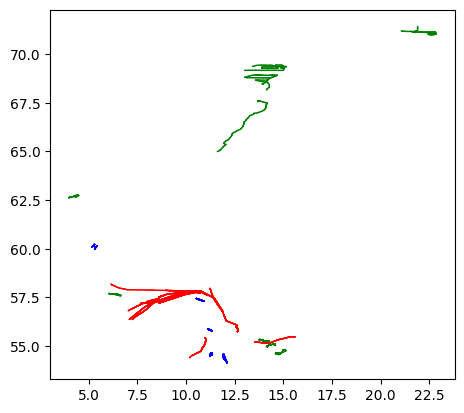

In [61]:
shiptype_to_color = {'Passenger': 'blue', 'Tanker': 'red','Fishing': 'green'}
traj_collection.plot(column='Ship type', column_to_color=shiptype_to_color, linewidth=1, capstyle='round')